In [5]:
%matplotlib notebook
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt


from nansat import Nansat, Domain, Nansatmap
from nansat.nsr import NSR

In [6]:
# GLOBCURRENT data at IFREMER: total surface current
CURRENT_DATA_SOURCE = 'http://tds0.ifremer.fr/thredds/dodsC/CLS-L4-CUREUL_HS-ALT_SUM-V02.0_FULL_TIME_SERIE'
# OC CCI data at PML: surface chlorophyll-a concentration
CHL_DATA_SOURCE = 'https://www.oceancolour.org/thredds/dodsC/CCI_ALL-v3.0-DAILY'
DATE = '2010-05-06'

In [37]:
# resolution (m)
res = 4000
# region of interest: Gulfstream
dom = Domain(NSR().wkt, '-te -80 25 -60 45 -tr 0.125 0.125')

In [38]:
# connect to PML
chln = Nansat(CHL_DATA_SOURCE, bands=['chlor_a'], date=DATE)
# change projection
chln.reproject(dom)
# subset and fetch data
chl = chln[1]

In [44]:
# connect to IFREMER
ngc = Nansat(CURRENT_DATA_SOURCE, date=DATE,
                bands=['eastward_eulerian_current_velocity',
                       'northward_eulerian_current_velocity'])
# change projection
ngc.reproject(dom)

In [41]:
# Get Eulerian current from GlobCurrent dataset
u = ngc['eastward_eulerian_current_velocity']
v = ngc['northward_eulerian_current_velocity']

<IPython.core.display.Javascript object>


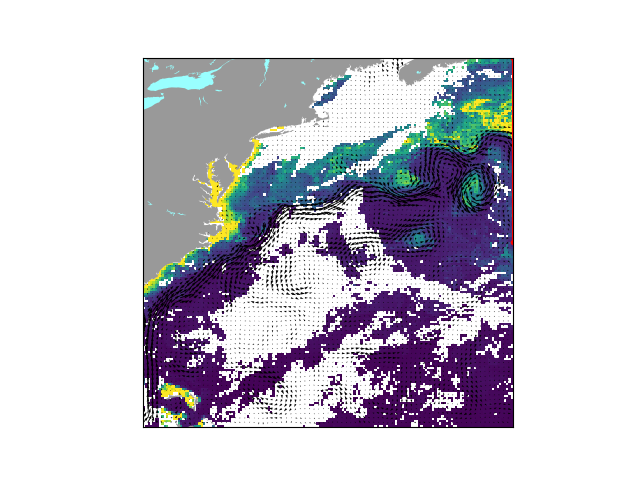

In [47]:
# create simplistic map including chlorophyll at background and current shown by vectors
# transect (used below) shown by red line
plt.close('all')
nmap = Nansatmap(dom, resolution='i')
nmap.imshow(chl, vmax=1.5)
nmap.quiver(u, v, step=2)
x,y = nmap([-60, -60], [35, 45])
nmap.plot(x, y, 'r.-')
nmap.save('gc_example.png', dpi=300)

In [48]:
# select dates for querying GC data (30 days starting from 1 May 2010)
date0 = dt.datetime(2010,5,1)
days = 30
dates = [(date0 + dt.timedelta(day)).strftime('%Y-%m-%d')
         for day in range(days)]

In [50]:
# container for U
uu = []
# loop over dates
for date in dates:
    print '.',
    # access IFREMER
    n = Nansat(CURRENT_DATA_SOURCE,
                 date=date,
                 bands=['eastward_eulerian_current_velocity'])
    # crop to transect region
    n.crop_lonlat([-61, -59], [34, 46])
    # get data from transect
    trn = n.get_transect([[-60, -60], [35, 45]], bands=[1])
    # add data to the container
    uu.append(trn['eastward_eulerian_current_velocity'])

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .


<IPython.core.display.Javascript object>


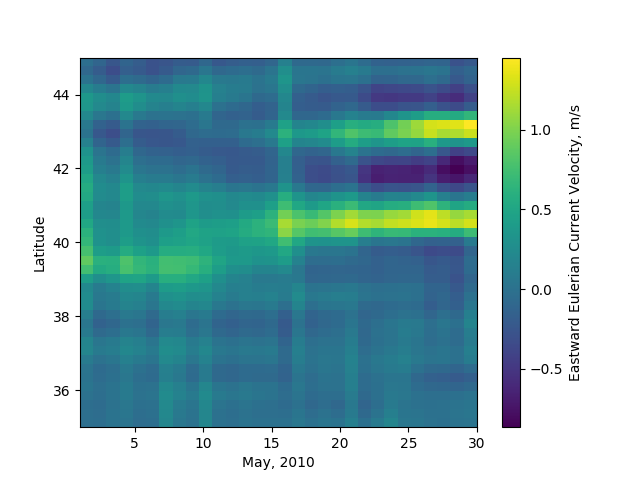

In [51]:
plt.figure()
plt.imshow(np.array(uu).T, extent=[1,30,35,45],aspect='auto')
plt.xlabel('May, 2010')
plt.ylabel('Latitude')
cbar = plt.colorbar()
cbar.set_label('Eastward Eulerian Current Velocity, m/s')